## Decision Tree Classifier

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

df.head()

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived
0,3,Mr. Owen Harris Braund,male,22.0,1.0,0,7.2500,0
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1.0,0,71.2833,1
2,3,Miss. Laina Heikkinen,female,NaN,0.0,0,7.9250,1
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,NaN,1.0,0,53.1000,1
4,3,Mr. William Henry Allen,male,NaN,0.0,0,8.0500,0


In [3]:
df.shape

(887, 8)

In [4]:
df.isna().sum()

Pclass                     0
Name                       0
Sex                        0
Age                        3
Siblings/Spouses Aboard    4
Parents/Children Aboard    0
Fare                       0
Survived                   0
dtype: int64

In [5]:
df.isna().sum().sum()

7

In [6]:
null_cols = df.columns[df.isna().any()].tolist()

null_cols

['Age', 'Siblings/Spouses Aboard']

#### Drop Null

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
Survived                   0
dtype: int64

In [9]:
null_cols = df.columns[df.isna().any()].tolist()

null_cols

[]

#### Feature Engineering

In [10]:
df = df.drop(['Name', 'Sex'], axis=1)

In [11]:
df.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived
0,3,22.0,1.0,0,7.2500,0
1,1,38.0,1.0,0,71.2833,1
5,3,27.0,0.0,0,8.4583,0
6,1,54.0,0.0,0,51.8625,0
7,3,2.0,3.0,1,21.0750,0


In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(X.shape)
print(y.shape)

(880, 5)
(880,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print()
print()
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (704, 5)
Shape of y_train:  (704,)


Shape of X_test:  (176, 5)
Shape of y_test:  (176,)


In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu, input_shape=[5]),
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               600       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,632
Trainable params: 1,632
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=3, batch_size=64, verbose=1, validation_data=(X_test, y_test))


Epoch 1/3
11/11 [==============================] - 1s 21ms/step - loss: 0.6971 - accuracy: 0.5114 - val_loss: 0.6942 - val_accuracy: 0.5398
Epoch 2/3
11/11 [==============================] - 0s 10ms/step - loss: 0.6938 - accuracy: 0.4801 - val_loss: 0.6935 - val_accuracy: 0.4489
Epoch 3/3
11/11 [==============================] - 0s 11ms/step - loss: 0.6934 - accuracy: 0.5142 - val_loss: 0.6933 - val_accuracy: 0.5284


In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


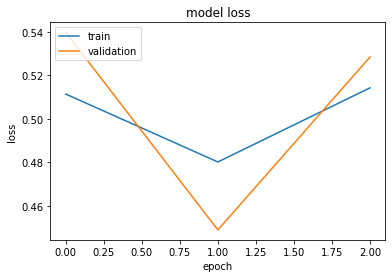

In [20]:
# "accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

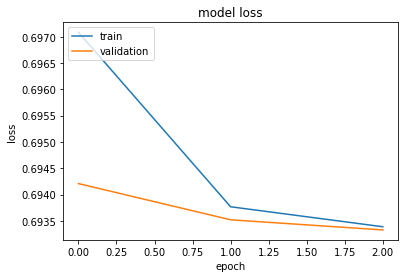

In [21]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [24]:
y_test

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [23]:
y_pred.shape

(176, 2)

In [25]:
y_pred[0:10]

array([[0.49867517, 0.50132483],
       [0.5014533 , 0.49854675],
       [0.52134705, 0.47865295],
       [0.49964523, 0.50035477],
       [0.5008784 , 0.49912164],
       [0.49826628, 0.5017337 ],
       [0.49864075, 0.5013592 ],
       [0.5158956 , 0.48410437],
       [0.5031357 , 0.4968643 ],
       [0.49144956, 0.5085504 ]], dtype=float32)

In [26]:
#predictions = best_model.predict(test_ds)
y_pred = np.argmax(y_pred, axis=1)

y_pred.shape

(176,)

In [27]:
y_pred[0:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [28]:
from sklearn import metrics

print('Accuracy Score: {:.3f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))  
print('')
print('Precision Score: {:.3f}%'.format(metrics.precision_score(y_test, y_pred, average='macro') * 100))  
print('')
print('Recall Score: {:.3f}%'.format(metrics.recall_score(y_test, y_pred, average='macro') * 100))  
print('')
print('F1 Score: {:.3f}%'.format(metrics.f1_score(y_test, y_pred, average='macro') * 100))  

Accuracy Score: 52.841%

Precision Score: 53.494%

Recall Score: 53.793%

F1 Score: 52.160%


In [29]:
from sklearn.metrics import classification_report

target_names = ['survived', 'died']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    survived       0.68      0.50      0.58       113
        died       0.39      0.57      0.46        63

    accuracy                           0.53       176
   macro avg       0.53      0.54      0.52       176
weighted avg       0.58      0.53      0.54       176



In [30]:
# Making the Confusion Matrix
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[57, 56],
       [27, 36]], dtype=int64)

In [31]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[57 56]
 [27 36]]


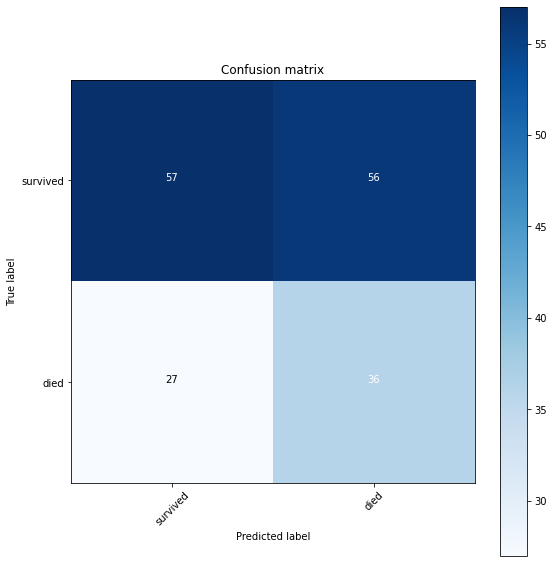

In [32]:
plt.figure(figsize=(8, 8))

plot_confusion_matrix(cm, target_names)